# Método simpléctico multipaso

## Ecuación diferencial no lineal


1. Resolver analíticamente la ecuación diferencial no lineal $$\frac{du}{dt} = u^q\qquad t \in [0,10]. $$

Suponga que $q>1$. Considere la sustitución $r = u^{1-q}$, de modo que $$ \frac{dr}{dt} = \frac{du}{dt} (1-q) u^{-q} = (1-q) u^{q}u^{-q} = (1-q).$$ Esto implica que $ r(t) = (1-q)t + C $ y entonces $$ u(t) = [(1-q)t+C]^{1/(1-q)}.$$ 

En caso que $q=1$, la solución es obvia: $$u(t) = Ce^t.$$ Para $q=0$, tendríamos $$u(t)=t + C. $$

2. Encontrar la solución numéricamente para algunos valores de q.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]

In [3]:
def RK4 (f, r0, t, q):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para ecuaciones 
    diferenciales ordinarias.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = [r0]

    for i in range(1,len(t)):
        k1 = f(t[i-1],y, q)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1, q)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2, q)
        k4 = f(t[i-1]+h, y + h*k3, q)

        y += h*(k1+2*k2+2*k3+k4)/6.
        solution += [y]

    return np.array(solution)

In [4]:
t = np.linspace(0,10,1000)

In [5]:
def func(t, u, q):
    return u**q

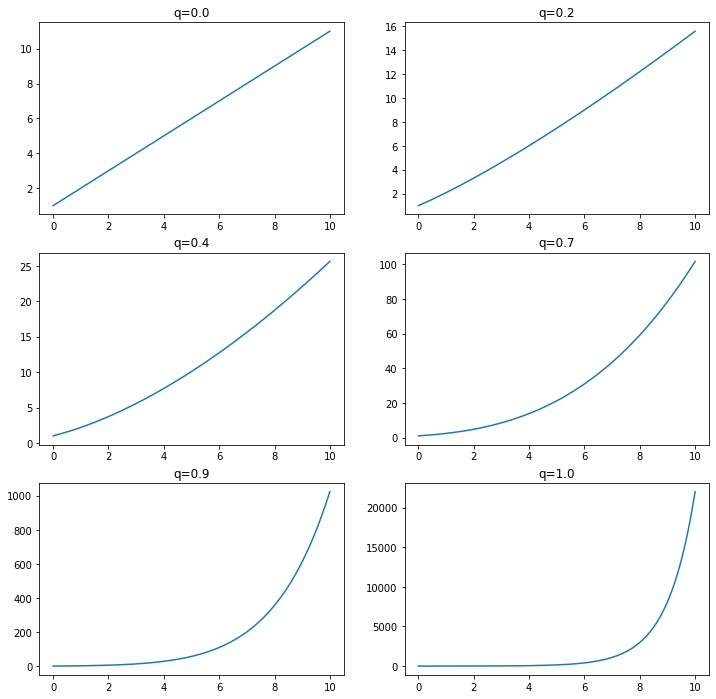

In [6]:
plt.figure(figsize=(12,12))

for i, val in enumerate(q):
    plt.subplot(3,2,i+1)
    u = RK4(func, 1., t, val)
    plt.plot(t,u)
    plt.title('q={:.1f}'.format(val))

plt.show()

## Métodos multi-paso

## Gravitational $ N $-body problem

## 4th Order Symplectic Integrator